<h1>Looping Graph</h1>

In [1]:
from langgraph.graph import StateGraph, START, END
import random
from typing import Dict, List, TypedDict

In [2]:
class AgentState(TypedDict):
    name: str
    number: List[int]
    counter: int

In [3]:
def greetingNode(state: AgentState) -> AgentState:
    """Greeting node which says hi to the patient""" 
    state["name"] = f"Hi There, {state["name"]}"
    state["counter"] = 0 #initializing counter is necessary
    return state

In [5]:
def randomNode(state: AgentState) -> AgentState:
    """Generates a random number from 0 to 10"""
    state["number"].append(random.randint(0, 10))
    state["counter"] += 1
    return state

In [9]:
def shouldContinue(state: AgentState) -> str:
    """Decider function"""
    if(state["counter"]<5):
        return "loopEdge"
    else:
        return "exitEdge"
     

In [11]:
graph = StateGraph(AgentState)
graph.add_node("greeter", greetingNode)
graph.add_node("random", randomNode)

graph.add_edge(START, "greeter")
graph.add_edge("greeter", "random")

graph.add_conditional_edges(
    "random",
    shouldContinue,
    {
        "loopEdge": "random",
        "exitEdge": END
    }
)

app = graph.compile()

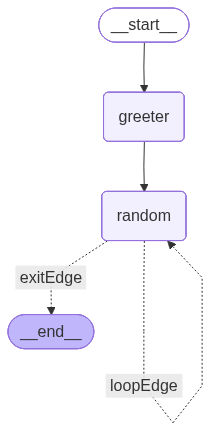

In [13]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [14]:
app.invoke({"name": "Debu", "number": [], "counter": "-1"})

{'name': 'Hi There, Debu', 'number': [7, 3, 0, 2, 3], 'counter': 5}